In [1]:
# Author: rentaowan.com

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

raw_data_file = "../data/ETHUSDT.csv"
column_names= ["Timestamp", "Price", "Volume"]

In [2]:
df = pd.read_csv(raw_data_file, header=None, names=column_names)

In [3]:
# Changing the unix epoch time to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")
df.set_index("Timestamp", inplace=True)
df.shape

(207727, 2)

In [4]:
# Remove duplicate timestamp (in seconds)
df = df.resample("1T").agg({"Price": "mean", "Volume": "sum"})
# Forward fill the price data
df["Price"] = df["Price"].ffill()
# Calculate price difference
df["diff"] = df["Price"].diff()

In [5]:
# 5 moving averages - 2, 4, 5, 8 & 12 hours
df["2H_ma"] = df["Price"].rolling(120).mean()
df["4H_ma"] = df["Price"].rolling(240).mean()
df["5H_ma"] = df["Price"].rolling(300).mean()
df["8H_ma"] = df["Price"].rolling(480).mean()
df["12H_ma"] = df["Price"].rolling(720).mean()

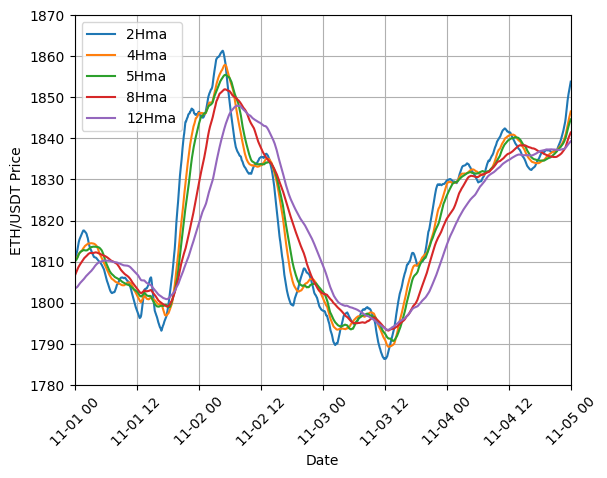

In [6]:
plt.plot(df["2H_ma"].dropna(), label="2Hma")
plt.plot(df["4H_ma"].dropna(), label="4Hma")
plt.plot(df["5H_ma"].dropna(), label="5Hma")
plt.plot(df["8H_ma"].dropna(), label="8Hma")
plt.plot(df["12H_ma"].dropna(), label="12Hma")
 

plt.xlim([datetime.datetime(2023, 11, 1, 0), datetime.datetime(2023, 11, 5, 0)])
plt.ylim(1780, 1870)

plt.xticks(rotation=45)

plt.legend()
plt.ylabel("ETH/USDT Price")
plt.xlabel("Date")

plt.grid()
plt.show()

In [7]:
# Calculate Moving Average Distance
df["dist1"] = df["2H_ma"] / df["12H_ma"]
df["dist2"] = df["4H_ma"] / df["12H_ma"]
df["dist3"] = df["5H_ma"] / df["12H_ma"]
df["dist4"] = df["8H_ma"] / df["12H_ma"]

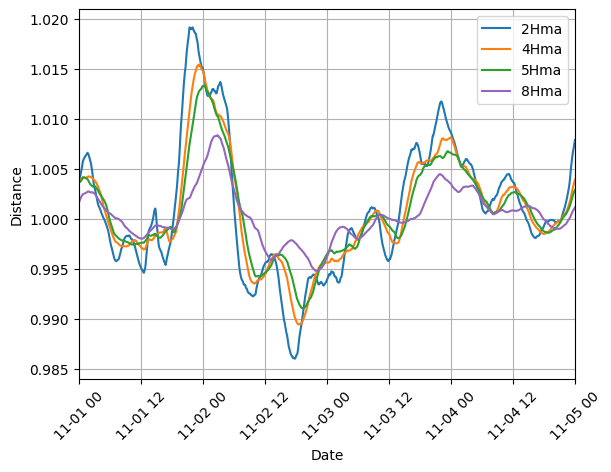

In [8]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

plt.plot(df["dist1"], label="2Hma")
plt.plot(df["dist2"], label="4Hma")
plt.plot(df["dist3"], label="5Hma")
plt.plot(df["dist4"], c=colors[4], label="8Hma")

# plt.axhline(1.005, label="Long Threshold", linestyle="--", c=colors[2])
# plt.axhline(0.995, label="Short Threshold", linestyle="--", c=colors[3])

plt.xlim([datetime.datetime(2023, 11, 1, 0), datetime.datetime(2023, 11, 5, 0)])
plt.ylim(0.984, 1.021)

plt.xticks(rotation=45)

plt.legend()
plt.ylabel("Distance")
plt.xlabel("Date")

plt.grid()
plt.show()

In [9]:
long_level = 1.003
short_level = 0.997

''' 
Sorry this section is hidden.
'''

# Detect signal
df["signal"] = np.zeros(size)
df["signal"] = np.where(df["pos1"] + df["pos2"]  >= 2, 1, df["signal"])   # long signal
# hidden ------------------------------------------------------------------ short signal

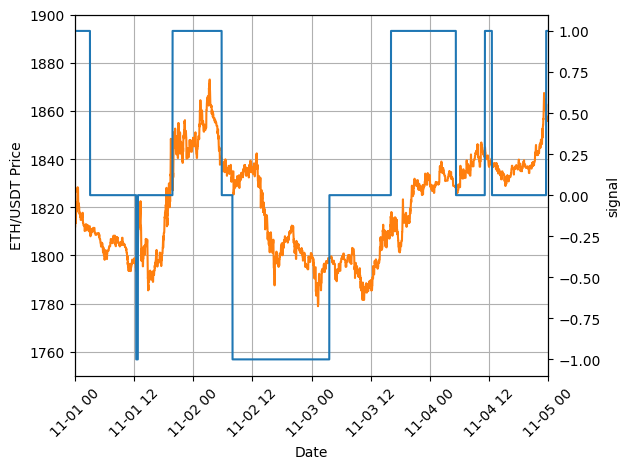

In [10]:
fig, ax1 = plt.subplots()
plt.grid()
plt.xticks(rotation=45)
plt.xlim([datetime.datetime(2023, 11, 1, 0), datetime.datetime(2023, 11, 5, 0)])

color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('ETH/USDT Price', color="black")
ax1.plot(df["Price"], color=color)
ax1.tick_params(axis='y', labelcolor="black")
ax1.set_ylim(1750, 1900)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('signal')  # we already handled the x-label with ax1
ax2.plot(df["signal"], color=color)
ax2.tick_params(axis='y')

fig.tight_layout()


plt.show()

In [13]:
# Calculate returns with initial investment amount of 2000 USDT
df["money"] = 0
starting_money = 2000

for index, row in df.iterrows():
    if row["signal"]: 
        starting_money += starting_money / row["Price"] * row["diff"]
    df.at[index, "money"] = starting_money

print(starting_money)

2805.5133398484477


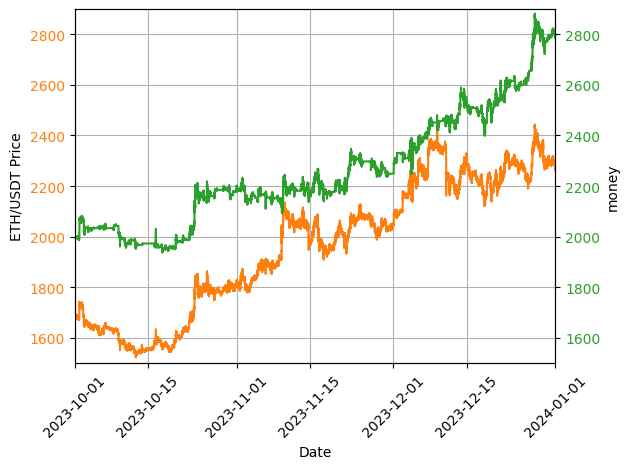

In [12]:
fig, ax1 = plt.subplots()
plt.grid()
plt.xticks(rotation=45)
plt.xlim([datetime.datetime(2023, 10, 1, 0), datetime.datetime(2024, 1, 1, 0)])

color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('ETH/USDT Price', color="black")
ax1.plot(df["Price"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(1500, 2900)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('money')  # we already handled the x-label with ax1
ax2.plot(df["money"], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(1500, 2900)

fig.tight_layout()


plt.show()